#here we test all the components.



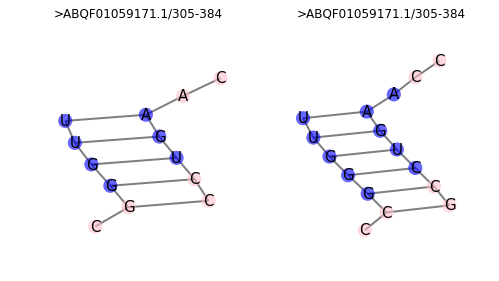

In [1]:
'''
first we test the core/interface extractor, since it is most essential
'''
%matplotlib inline
from testgraphs import get_graphs
from myutils import * #for drawing
import extract

#get a graph
gr=get_graphs()
g=gr.next()
g=extract.preprocess(g)
#lets see..
a=extract.extract_core_and_interface(1,g,[2,3],[2])
drawgraphs([ a[0].graph,a[1].graph ])


In [ ]:
'''
second is reading a grammar and training an estimator
'''
%matplotlib inline
from testgraphs import get_graphs
from myutils import * #for drawing
from adaptiveMHgraphsampler import adaptiveMHgraphsampler

sampler=adaptiveMHgraphsampler()
sampler.train_estimator_and_extract_grammar(get_graphs(),[2,4],[2],n_jobs=4)


draw_grammar(sampler,3)
print sampler.estimator
sampler.save('demo.ge')


In [ ]:
'''
now lets see if we can improve graphs
'''

%matplotlib inline
from testgraphs import get_graphs
from myutils import * #for drawing
from adaptiveMHgraphsampler import adaptiveMHgraphsampler
import itertools
import matplotlib.pyplot as plt


sampler=adaptiveMHgraphsampler()
sampler.load('demo.ge')
graphs=get_graphs()
graphs = sampler.mass_improve_random(graphs,times=50)
    
history=[]
oldgr= itertools.islice(get_graphs(),3)
for (old,new) in itertools.izip(oldgr,graphs): 
    history.append(new.scorehistory)
    drawgraphs([old,new])
    
    
t = range(50)
for h in history:
    plt.plot(t, h)
plt.show()
    




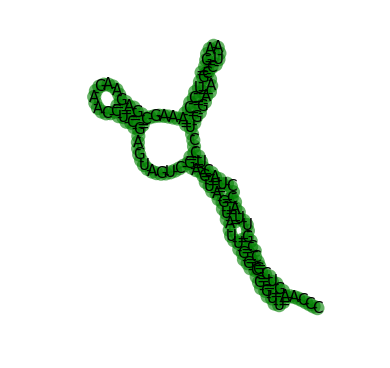

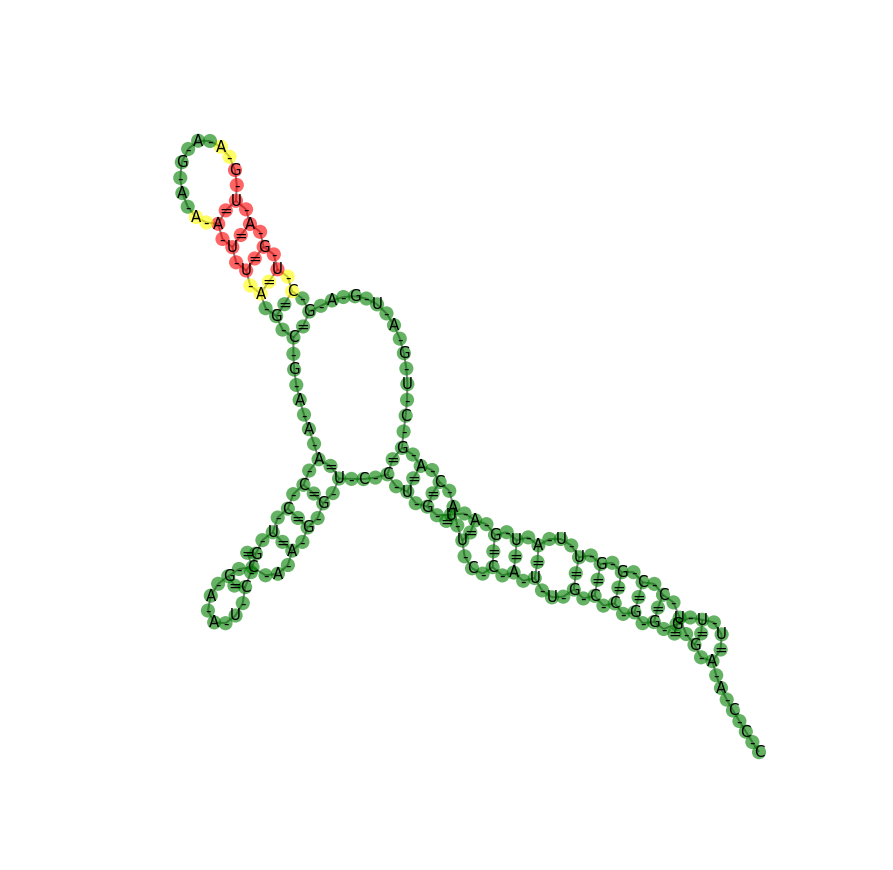

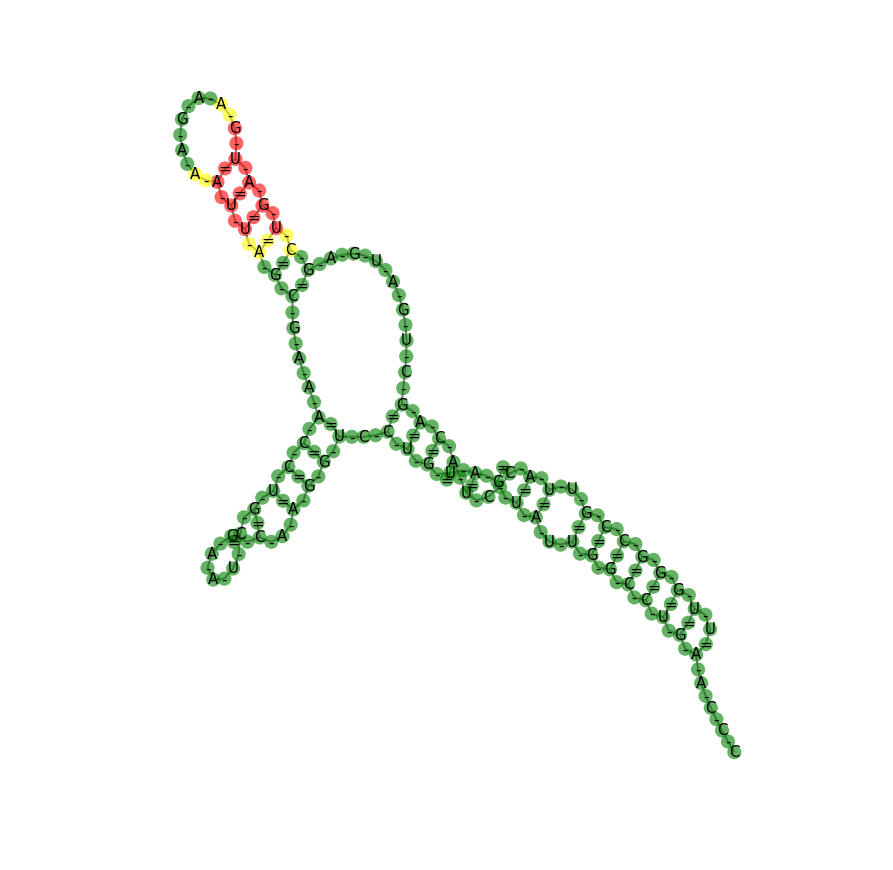